In [ ]:
!nvidia-smi

Wed Jun 16 16:18:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Clone repo

In [1]:
!git clone https://github.com/kaylode/vnm-ocr-toolbox.git main
%cd main

Cloning into 'main'...
remote: Enumerating objects: 1246, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 1246 (delta 54), reused 58 (delta 37), pack-reused 1166 (from 1)
Receiving objects: 100% (1246/1246), 23.63 MiB | 19.64 MiB/s, done.
Resolving deltas: 100% (622/622), done.
/content/main


In [3]:
!pwd

/content/main


In [5]:
%cd /content/main
!git checkout master
!git reset --hard HEAD
!git pull

/content/main
Already on 'master'
Your branch is up to date with 'origin/master'.
HEAD is now at ef8744b update dataset link
Already up to date.


# Install dependencies

In [21]:
!pip uninstall -y torchvision
!pip install torch torchvision torchaudio

INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.6

In [16]:
!pip install pylsd-nova

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylsd-nova: filename=pylsd_nova-1.2.1-py3-none-any.whl size=172445 sha256=dcc9556abc25e40ff83a3ea6e76446f9c59992094bde0884966d6417805c5574
  Stored in directory: /root/.cache/pip/wheels/dc/5b/23/728b076556bdf6df562d71f18c7ff33b8085bcce5c16341507
Successfully built pylsd-nova


In [10]:
!pip install -r requirements.txt

  Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
  Using cached Polygon3-3.0.9.1.tar.gz (39 kB)
  Preparing metadata (setup.py) ... done
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached ocrd_fork_pylsd-0.0.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached einops-0.2.0-py2.py3-none-any.whl.metadata (8.7 kB)
  Using cached prefetch_generator-1.0.1.tar.gz (3.4 kB)
  Preparing metadata (setup.py) ... done
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached lmdb-1.0.0.tar.gz (876 kB)
  Preparing metadata (setup.py) ... done
  Using cached transformers-4.6.1-py3-none-any.whl.metadata (45 kB)
  Using cached torchnet-0.0.4.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached gdown-3.13.0.tar.gz (9.3 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached 

# Download pretrained weights

In [13]:
# %cd /content/main
# !mkdir "/content/main/weights"

import gdown
def download_weights(id_or_url, cached=None, md5=None, quiet=False):
    if id_or_url.startswith('http'):
        url = id_or_url
    else:
        url = 'https://drive.google.com/uc?id={}'.format(id_or_url)

    return gdown.cached_download(url=url, path=cached, md5=md5, quiet=quiet)


weight_url = {
    "pan_resnet18_default": "1GKs-NnezTc6WN0P_Zw7h6wYzRRZdJFKl" ,
    "pan_resnet18_sroie19": "1-QvIN0MrP28URQILYvLaF1G1eTx2oh8W" ,
    "transformerocr_mcocr": "1qpXp_-digz2HPTGY_GPdwstzGLhjC_ot",
    "transformerocr_default_vgg": "13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA",
    "transformerocr_default_resnet50": "12dTOZ9VP7ZVzwQgVvqBWz5JO5RXXW5NY",
    "transformerocr_default_resnet50_fpn": "12dTOZ9VP7ZVzwQgVvqBWz5JO5RXXW5NY",
    "transformerocr_config": "1xQqR9swWNCTLEa0ensPDT0HDBHTke3xT",
    "phobert_mcocr": "1v4GQPg4Jx5FWvqJ-2k9YCxEd6iFdlXXa"
}

def download_pretrained_weights(name, cached=None):
    return download_weights(weight_url[name], cached)

# from tool.utils import download_pretrained_weights
download_pretrained_weights("pan_resnet18_sroie19", cached="/content/main/weights/PANNet_best_map.pth")
download_pretrained_weights("transformerocr_mcocr", cached="/content/main/weights/transformerocr.pth")
download_pretrained_weights("phobert_mcocr", cached="/content/main/weights/phobert_report.pth")

Cached downloading...
From (original): https://drive.google.com/uc?id=1-QvIN0MrP28URQILYvLaF1G1eTx2oh8W
From (redirected): https://drive.google.com/uc?id=1-QvIN0MrP28URQILYvLaF1G1eTx2oh8W&confirm=t&uuid=7cf248cb-e7d0-4c99-a393-c1135060014d
To: /content/main/weights/PANNet_best_map.pth
100%|██████████| 138M/138M [00:01<00:00, 91.1MB/s]
Cached downloading...
From (original): https://drive.google.com/uc?id=1qpXp_-digz2HPTGY_GPdwstzGLhjC_ot
From (redirected): https://drive.google.com/uc?id=1qpXp_-digz2HPTGY_GPdwstzGLhjC_ot&confirm=t&uuid=9d038571-5753-458a-88c0-6d8fe1499bf2
To: /content/main/weights/transformerocr.pth
100%|██████████| 152M/152M [00:01<00:00, 82.5MB/s]
Cached downloading...
From (original): https://drive.google.com/uc?id=1v4GQPg4Jx5FWvqJ-2k9YCxEd6iFdlXXa
From (redirected): https://drive.google.com/uc?id=1v4GQPg4Jx5FWvqJ-2k9YCxEd6iFdlXXa&confirm=t&uuid=95c71c98-a0b6-4c74-94ab-bab772460826
To: /content/main/weights/phobert_report.pth
100%|██████████| 545M/545M [00:08<00:00, 6

'/content/main/weights/phobert_report.pth'

# Inference

## Inference script

In [14]:
%cd /content/main
from IPython.display import Image
from IPython.display import display

IMAGE_ID = "201be0a2fea60af853b7"

!python run.py --input=/content/"{IMAGE_ID}".jpg --output=/content/main/results/"{IMAGE_ID}" --do_retrieve --debug --find_best_rotation

img1 = Image(f"/content/main/data/mcocr/images/val/{IMAGE_ID}.jpg", width=600)
img2 = Image(f"/content/main/results/{IMAGE_ID}/cache/preprocessed.jpg", width=600)
img3 = Image(f"/content/main/results/{IMAGE_ID}/cache/detected.jpg", width=600)
img4 = Image(f"/content/main/results/{IMAGE_ID}/result.jpg", width=600)

display(img1,img2,img3,img4)

/content/main
Traceback (most recent call last):
  File "/content/main/run.py", line 10, in <module>
    from modules import Preprocess, Detection, OCR, Retrieval, Correction
  File "/content/main/modules/__init__.py", line 11, in <module>
    from .preprocess import DocScanner
  File "/content/main/modules/preprocess/__init__.py", line 1, in <module>
    from .scan import DocScanner
  File "/content/main/modules/preprocess/scan.py", line 16, in <module>
    from pylsd.lsd import lsd
  File "/usr/local/lib/python3.11/dist-packages/pylsd/__init__.py", line 8, in <module>
    from lsd import lsd
ModuleNotFoundError: No module named 'lsd'


FileNotFoundError: No such file or directory: '/content/main/data/mcocr/images/val/201be0a2fea60af853b7.jpg'

FileNotFoundError: No such file or directory: '/content/main/data/mcocr/images/val/201be0a2fea60af853b7.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '/content/main/results/201be0a2fea60af853b7/cache/preprocessed.jpg'

FileNotFoundError: No such file or directory: '/content/main/results/201be0a2fea60af853b7/cache/preprocessed.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '/content/main/results/201be0a2fea60af853b7/cache/detected.jpg'

FileNotFoundError: No such file or directory: '/content/main/results/201be0a2fea60af853b7/cache/detected.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '/content/main/results/201be0a2fea60af853b7/result.jpg'

FileNotFoundError: No such file or directory: '/content/main/results/201be0a2fea60af853b7/result.jpg'

<IPython.core.display.Image object>

## Inference modules on Personal ID

In [1]:
%cd /content/main
import os
import cv2
import re
import pandas as pd
from modules import Preprocess, Detection, OCR, Correction
from tool.utils import natural_keys, visualize
import time
import matplotlib.pyplot as plt

/content/main


ModuleNotFoundError: No module named 'torchvision.models.utils'

In [ ]:
# Define some variables
img_id = "cmnd_Ngc_M_1_0012"

det_weight = None
ocr_weight = None

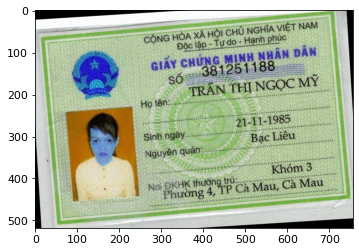

In [ ]:
# Read image
img = cv2.imread(f"/content/drive/MyDrive/AI Competitions/IDCard parser/aug/{img_id}.jpg")

plt.imshow(img)
plt.show()

In [ ]:
# Initialize modules

det_model = Detection(weight_path=det_weight)
ocr_model = OCR(weight_path=ocr_weight)
preproc = Preprocess(
    det_model=det_model,
    ocr_model=ocr_model,
    find_best_rotation=False)
correction = Correction()

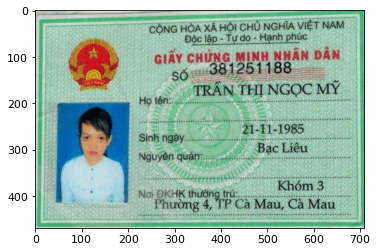

In [ ]:
# Preprocess image

img1 = preproc(img)

plt.imshow(img1)
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


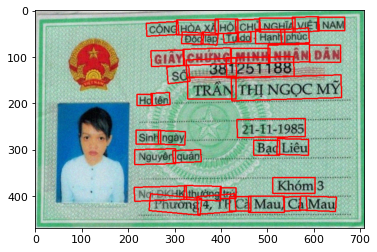

In [ ]:
# Detect texts

boxes, img2  = det_model(
    img1,
    crop_region=True,                               #Crop detected regions for OCR
    return_result=True,                             # Return plotted result
    output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
)

plt.imshow(img2)
plt.show()

In [ ]:
# Text OCR

img_paths=os.listdir(f"/content/main/results/{img_id}/crops") # Cropped regions
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True) # OCR
texts = correction(texts)   # Word correction

for i in texts:
    print(i)

['FINAM', 'A VIỆT', 'NGHĨA', 'HỘI', 'HÒA XÃ', 'CHỦ', 'CỘNG', 'Hạnh', 'phúc', 'Độc', 'lập', 'do', 'Tư', 'NHÂN', 'DÂN', 'MINH', 'CHỨNG', 'GIẤY', '1251188', '381', 'số', 'TRẦN', 'THỊ NGỌC MỸ', 'tên', 'Họ', '21-11-1985', 'Sinh', 'ngày', 'Liêu', 'Bạc', 'Nguyên', 'quán', 'Khóm', 'thường', 'Nơi ĐKHK', 'trú', 'Phường', 'Mau', 'Là Mau', '34, TP.', 'Cà', 'Cà']


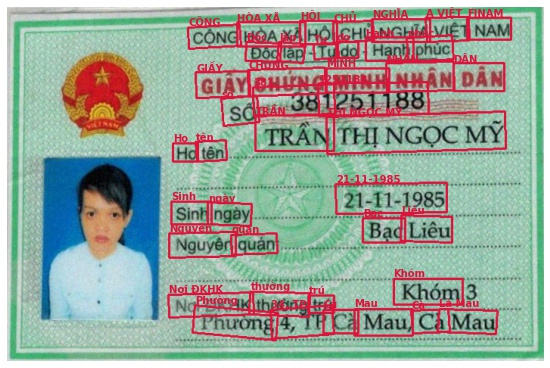

In [ ]:
preds, probs = None, None
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=class_mapping,
    labels = preds, probs = probs,
    visualize_best=False)


from IPython.display import Image
from IPython.display import display

img = Image(f"/content/main/results/{img_id}/result.jpg", width=600)
display(img)

In [ ]:
preds, probs = None, None
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=class_mapping,
    labels = preds, probs = probs,
    visualize_best=False)

end = time.time()
print(f"Executed in {end-start} s")

In [ ]:
!rm -rf ".cache"

## Inference modules on Invoice

In [ ]:
%cd /content/main
import os
import cv2
import re
import pandas as pd
from modules import Preprocess, Detection, OCR, Retrieval, Correction
from tool.utils import natural_keys, visualize
import time
import matplotlib.pyplot as plt

/content/main


In [ ]:
# Define some auxiliary functions

def find_highest_score_each_class(labels, probs):
        best_score = [0] * (len(class_mapping.keys())-1)
        best_idx = [-1] * (len(class_mapping.keys())-1)
        for i, (label, prob) in enumerate(zip(labels, probs)):
            label_idx = class_mapping[label]
            if label_idx != class_mapping["NONE"]:
                if prob > best_score[label_idx]:
                    best_score[label_idx] = prob
                    best_idx[label_idx] = i
        return best_idx

def find_total_cost_value(total_cost_idx, boxes):
    total_cost_box = boxes[total_cost_idx]
    x1,y1 = total_cost_box[0]
    for i in range(total_cost_idx+1, len(boxes)):
        x1_,y1_ = boxes[i][0]

        if abs(x1-x1_) < 2:
          return i-1


def extract_timestamp(text):
    x = re.findall(r'\d{2}:\d{2}|\d{2}:\d{2}:\d{2}|\d{2}-\d{2}-\d{2}|\d{2}\.\d{2}\.\d{2}|\d+/\d+/\d+', text)
    return ' '.join(x)

In [ ]:
# Define some variables
img_id = "mcocr_val_145115bxsnt"
class_mapping = {"SELLER":0, "ADDRESS":1, "TIMESTAMP":2, "TOTAL_COST":3, "NONE":4}
idx_mapping = {0:"SELLER", 1:"ADDRESS", 2:"TIMESTAMP", 3:"TOTAL_COST", 4:"NONE"}

det_weight = "/content/drive/MyDrive/AI Competitions/MC-OCR/checkpoints/detection-checkpoints/best_rotation/PANNet_best_map.pth"
ocr_weight = "/content/drive/MyDrive/AI Competitions/MC-OCR/checkpoints/ocr-checkpoints/transformerocr.pth"

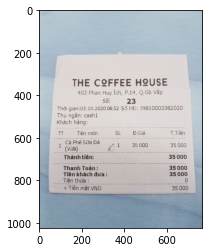

In [ ]:
# Read image
img = cv2.imread(f"/content/main/data/mcocr/images/val/{img_id}.jpg")

plt.imshow(img)
plt.show()

In [ ]:
# Initialize modules

det_model = Detection(weight_path=det_weight)
ocr_model = OCR(weight_path=ocr_weight)
preproc = Preprocess(
    det_model=det_model,
    ocr_model=ocr_model,
    find_best_rotation=False)
retrieval = Retrieval(class_mapping, mode = 'all')
correction = Correction()

load pretrained models from imagenet
File exists: .cache/bert_weight.pth


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

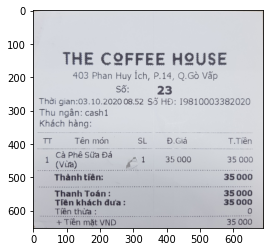

In [ ]:
# Preprocess image

img1 = preproc(img)

plt.imshow(img1)
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


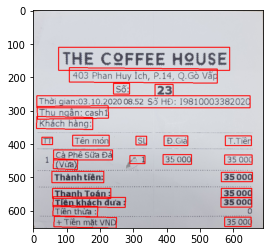

In [ ]:
# Detect texts

boxes, img2  = det_model(
    img1,
    crop_region=True,                               #Crop detected regions for OCR
    return_result=True,                             # Return plotted result
    output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
)

plt.imshow(img2)
plt.show()

In [ ]:
# Text OCR

img_paths=os.listdir(f"/content/main/results/{img_id}/crops") # Cropped regions
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True) # OCR
texts = correction(texts)   # Word correction

for i in texts:
    print(i)

THE COFFEE HQUSE
403 Phan Huy Ích, P.14, Q.Gò Vấp
Số:
23
Thời gian: 03.10.2020 08.52 Số HĐ: 19810003382020
Thu ngân: cash1
Khách hàng:
Tên món
Đ.Giá
T.Tiền
SL
TT
Cả Phê Sửa Đá
35 000
35 000
A 1
(Vừa)
Thành tiền:
35000
Thanh Toán:
35000
Tiên khách đưa:
35000
Tiền thừa:
+ Tiền mặt VND
35 000


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 13/13 [00:00<00:00, 36.48it/s]


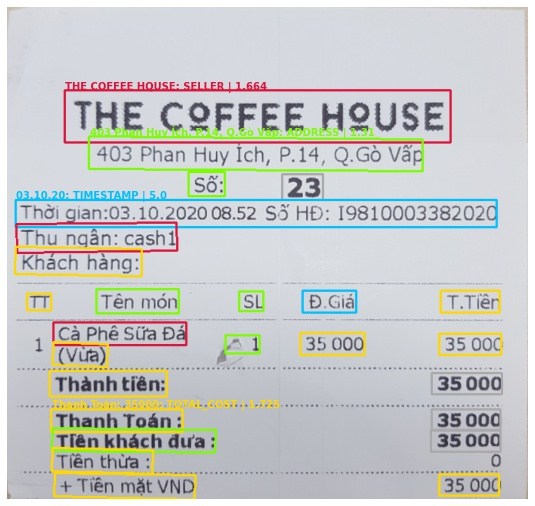

In [ ]:
preds, probs = retrieval(texts)

# Custom post-process
best_score_idx = find_highest_score_each_class(preds, probs)
value_idx = find_total_cost_value(best_score_idx[3], boxes)
if value_idx != best_score_idx[3]:
    texts[best_score_idx[3]] += (" " + texts[value_idx])

texts[best_score_idx[2]] = extract_timestamp(texts[best_score_idx[2]])

# Visualize and save result
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=class_mapping,
    labels = preds, probs = probs,
    visualize_best=True)

with open(f"/content/main/results/{img_id}/result.txt", 'w') as f:
    for cls, idx in enumerate(best_score_idx):
        f.write(f"{idx_mapping[cls]} : {texts[idx]}\n")

from IPython.display import Image
from IPython.display import display

img = Image(f"/content/main/results/{img_id}/result.jpg", width=600)
display(img)